<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 05: Building Tables

Associated Textbook Sections: [5.0, 5.1, 5.2, 5.3](https://inferentialthinking.com/chapters/05/Sequences.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-05:-Building-Tables" data-toc-modified-id="Lecture-05:-Building-Tables-1">Lecture 05: Building Tables</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Arrays" data-toc-modified-id="Arrays-1.3">Arrays</a></span><ul class="toc-item"><li><span><a href="#Demo:-Columns-of-Tables-are-Arrays" data-toc-modified-id="Demo:-Columns-of-Tables-are-Arrays-1.3.1">Demo: Columns of Tables are Arrays</a></span></li><li><span><a href="#Ranges" data-toc-modified-id="Ranges-1.3.2">Ranges</a></span></li></ul></li><li><span><a href="#Ranges" data-toc-modified-id="Ranges-1.4">Ranges</a></span><ul class="toc-item"><li><span><a href="#Ways-to-Create-a-Table" data-toc-modified-id="Ways-to-Create-a-Table-1.4.1">Ways to Create a Table</a></span></li><li><span><a href="#Demo:-Creating-a-Table-from-Scratch" data-toc-modified-id="Demo:-Creating-a-Table-from-Scratch-1.4.2">Demo: Creating a Table from Scratch</a></span></li></ul></li><li><span><a href="#Example:-W.-E.-B.-Du-Bois" data-toc-modified-id="Example:-W.-E.-B.-Du-Bois-1.5">Example: W. E. B. Du Bois</a></span><ul class="toc-item"><li><span><a href="#Demo:-Reading-a-Table-from-a-File" data-toc-modified-id="Demo:-Reading-a-Table-from-a-File-1.5.1">Demo: Reading a Table from a File</a></span></li><li><span><a href="#Table-Methods" data-toc-modified-id="Table-Methods-1.5.2">Table Methods</a></span></li><li><span><a href="#Demo:-Selecting-Data-in-a-Column" data-toc-modified-id="Demo:-Selecting-Data-in-a-Column-1.5.3">Demo: Selecting Data in a Column</a></span></li></ul></li></ul></li></ul></div>

## Arrays

### Demo: Columns of Tables are Arrays

Import the data on skyscrapers as a table and explore the San Francisco content of that table.

In [2]:
skyscrapers = Table.read_table('skyscrapers_v2.csv')
skyscrapers

name,material,city,height,completed
One World Trade Center,mixed/composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,mixed/composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
Chrysler Building,steel,New York City,318.9,1930


In [15]:
sf = skyscrapers.where('city', 'San Francisco')
sf.sort('height', descending=True)

name,material,city,height,completed
Transamerica Pyramid,mixed/composite,San Francisco,260,1972
555 California Street,steel,San Francisco,237.44,1969
345 California Center,steel,San Francisco,211.84,1986
Millennium Tower,concrete,San Francisco,196.6,2009
One Rincon Hill South Tower,concrete,San Francisco,184.41,2008
101 California Street,steel,San Francisco,183,1982
50 Fremont Center,steel,San Francisco,183,1985
Chevron Tower,steel,San Francisco,174.65,1975
Four Embarcadero Center,steel,San Francisco,173.74,1984
One Embarcadero Center,steel,San Francisco,173.43,1970


In [4]:
sf.select('height')

height
260
237.44
211.84
196.6
184.41
183
183
174.65
173.74
173.43


In [6]:
height_array = sf.column('height')
height_array

array([260.        , 237.44000244, 211.83999634, 196.6000061 ,
       184.41000366, 183.        , 183.        , 174.6499939 ,
       173.74000549, 173.42999268, 172.25      , 172.        ,
       168.        , 165.        , 163.97999573, 161.24000549,
       161.24000549, 159.69999695, 152.3999939 , 150.88000488,
       150.27000427, 149.96000671, 148.44000244, 148.44000244,
       147.52999878, 145.1000061 , 145.        , 144.        ,
       142.        , 133.5       , 132.8999939 , 132.69999695,
       132.6000061 , 129.5       , 128.02000427, 128.        ,
       127.40000153, 127.        , 126.        , 126.        ,
       125.        , 122.        , 121.30000305, 115.37000275,
       115.22000122, 114.30000305, 112.77999878, 111.        ,
       108.        , 106.69999695, 106.37999725, 101.41999817,
       100.58000183, 100.58000183, 100.        ,  98.25      ,
        90.83000183,  86.87000275,  74.68000031,  71.31999969,
        64.        ])

In [7]:
np.average(height_array)

139.27442681984814

Add the Salesforce Tower to the table using [the information from Wikipedia](https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_San_Francisco) and observe how adding just one very tall building can drastically change the average height. 

The demonstrated method to add a row of information to a table is destructive. Be care when you use they kinds of operations. Always check the documentation.

In [16]:
sf.append(['Salesforce Tower', 'Steel', 'San Franicsco', 1070, 2018])
sf = sf.sort('height', descending=True)
sf

name,material,city,height,completed
Salesforce Tower,Steel,San Franicsco,1070,2018
Transamerica Pyramid,mixed/composite,San Francisco,260,1972
555 California Street,steel,San Francisco,237.44,1969
345 California Center,steel,San Francisco,211.84,1986
Millennium Tower,concrete,San Francisco,196.6,2009
One Rincon Hill South Tower,concrete,San Francisco,184.41,2008
101 California Street,steel,San Francisco,183,1982
50 Fremont Center,steel,San Francisco,183,1985
Chevron Tower,steel,San Francisco,174.65,1975
Four Embarcadero Center,steel,San Francisco,173.74,1984


In [18]:
sf_copy = sf.copy()
sf_copy.append(['Salesforce Tower', 'Steel', 'San Franicsco', 1070, 2018])
sf_copy.sort('height', descending=True)

name,material,city,height,completed
Salesforce Tower,Steel,San Franicsco,1070,2018
Salesforce Tower,Steel,San Franicsco,1070,2018
Transamerica Pyramid,mixed/composite,San Francisco,260,1972
555 California Street,steel,San Francisco,237.44,1969
345 California Center,steel,San Francisco,211.84,1986
Millennium Tower,concrete,San Francisco,196.6,2009
One Rincon Hill South Tower,concrete,San Francisco,184.41,2008
101 California Street,steel,San Francisco,183,1982
50 Fremont Center,steel,San Francisco,183,1985
Chevron Tower,steel,San Francisco,174.65,1975


In [19]:
sf

name,material,city,height,completed
Salesforce Tower,Steel,San Franicsco,1070,2018
Transamerica Pyramid,mixed/composite,San Francisco,260,1972
555 California Street,steel,San Francisco,237.44,1969
345 California Center,steel,San Francisco,211.84,1986
Millennium Tower,concrete,San Francisco,196.6,2009
One Rincon Hill South Tower,concrete,San Francisco,184.41,2008
101 California Street,steel,San Francisco,183,1982
50 Fremont Center,steel,San Francisco,183,1985
Chevron Tower,steel,San Francisco,174.65,1975
Four Embarcadero Center,steel,San Francisco,173.74,1984


In [20]:
np.average(sf.column('height'))

154.2861296130764

### Ranges

* A range is an array of consecutive numbers
    * `np.arange(stop)`: An array of increasing integers from `0` up to `stop`
    * `np.arange(start, stop)`: An array of increasing integers from `start` up to `stop`
    * `np.arange(start, stop, step)`: A range with step between consecutive values
* The range always includes `start` but excludes `stop`

## Ranges ##

Make an array explicitly using `make_array` and then construct it and several others using `np.arange`. Access items in an array using the `item` method. Explore the documentation for `np.arange` and force some common errors.

For those with experience using Python arrays, keep in mind that this course does not use the bracket notation `[]` to access items in an array and that may trigger an error in the auto-grader on assignments.

In [21]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [22]:
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

In [28]:
np.arange(1, 101, 10)

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [29]:
x = np.arange(50, 4, -5)
x

array([50, 45, 40, 35, 30, 25, 20, 15, 10,  5])

In [30]:
x.item(0)

50

In [31]:
x.item(1)

45

In [32]:
x.item(9)

5

In [33]:
x.item(10)

IndexError: index 10 is out of bounds for axis 0 with size 10

### Ways to Create a Table

* `Table.read_table(filename)` - reads a table from a spreadsheet
* `Table()` - an empty table
* and… `select`, `drop`, `where`, `sort` and a few other table methods all create new tables

### Demo: Creating a Table from Scratch

Create a table containing information on the major east-west streets north of the Ocean campus and how far they are from campus. Make sure how to see that most table methods will end up creating a new table and not modify the original one.

[Google Maps near CCSF - Ocean Campus](https://goo.gl/maps/QVR57VvqKWqLeSA9A)

In [34]:
streets = make_array('Judson', 'Staples', 'Flood', 'Hearst')
streets

array(['Judson', 'Staples', 'Flood', 'Hearst'], dtype='<U7')

In [36]:
northside = Table().with_column('Streets', streets)
northside

Streets
Judson
Staples
Flood
Hearst


In [37]:
northside.with_column('Blocks from campus', np.arange(4))


Streets,Blocks from campus
Judson,0
Staples,1
Flood,2
Hearst,3


In [38]:
northside

Streets
Judson
Staples
Flood
Hearst


There are various properties of a table that you can access as well using the dot notation such as labels, num_columns, and num_rows.

In [39]:
northside = northside.with_column('Blocks from campus', np.arange(4))
northside.labels

('Streets', 'Blocks from campus')

In [41]:
northside.num_columns

2

In [42]:
northside.num_rows

4

## Example: W. E. B. Du Bois

Image Source: [Wikipedia - W. E. B. Du Bois](https://en.wikipedia.org/wiki/W._E._B._Du_Bois)

<a href="https://en.wikipedia.org/wiki/W._E._B._Du_Bois"><img src="./img/WEB_DuBois_1918.jpeg" width = 12%></a>

* Scholar, historian, activist, and data scientist
* NAACP founder
* Made a series of visualizations for the 1900 Paris Exposition
    * Goal: change the way people see Black Americans
    * Hundreds of photographs and patents
    * 60+ handmade graphs in 3 months

Image Sources:
* [Smithsonian Magazine - W.E.B. Du Bois’ Visionary Infographics Come Together for the First Time in Full Color](https://www.smithsonianmag.com/history/first-time-together-and-color-book-displays-web-du-bois-visionary-infographics-180970826/#)
* [WBUR - W.E.B. Du Bois Created These Infographics In 1900 To Humanize The African-American Experience](https://www.wbur.org/news/2019/02/21/web-du-bois-infographics-humanity-african-american)

<img src="//cdn.thinglink.me/api/image/1119379323288027138/1024/10/scaletowidth#tl-1119379323288027138;1750075619" width=32%>

<img src="//cdn.thinglink.me/api/image/1119380866397634562/1024/10/scaletowidth#tl-1119380866397634562;1750075619" width = 32%>

<img src="./img/WEB_DuBois_income_and_expenditure.jpeg" width = 50%>

### Demo: Reading a Table from a File

Read the `du_bois.csv` data as a table.

In [43]:
du_bois = Table.read_table('du_bois.csv')
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO


Find the income bracket (`CLASS`) that spent the highest percentage of their income on rent.

In [44]:
du_bois.sort('RENT', descending=True)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO


Explore the table using `select`, `column`

In [45]:
du_bois.select("STATUS")

STATUS
POOR
POOR
FAIR
FAIR
COMFORTABLE
COMFORTABLE
WELL-TO-DO


Add a column to the table showing the dollar amount for food based on the presented average.

In [47]:
food_in_dollars = du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')
food_in_dollars

array([ 59.813 , 117.2415, 144.3338, 160.5134, 169.57  , 325.6   ,
       326.25  ])

In [48]:
du_bois = du_bois.with_column("Food Cost in Dollars", food_in_dollars)
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food Cost in Dollars
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO,326.25


Format the `Food` column as a percent using the `set_format` method.

In [49]:
du_bois.set_format('FOOD', PercentFormatter)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food Cost in Dollars
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25


In [50]:
du_bois.relabeled("Food Cost in Dollars", "FOOD COST IN DOLLARS")

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,FOOD COST IN DOLLARS
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25


In [51]:
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food Cost in Dollars
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25


### Table Methods

* Creating and extending tables: `Table().with_column` and `Table.read_table`
* Finding the size: `num_rows` and `num_columns`
* Referring to columns: labels, relabeling, and indices 
    * `labels` and `relabeled`; column indices start at 0
* Accessing data in a column: `column` takes a label or index and returns an array
* Using array methods to work with data in columns: `item`, `sum`, `min`, `max`, and so on
* Creating new tables containing some of the original columns: `select`, `drop`

### Demo: Selecting Data in a Column

Explore the `movies_by_year_with_ticket_price.csv` data set trying to implement several of the methods used so far. Also, preview the `plot` method.

In [52]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens
2014,8.17,10436.8,708,American Sniper
2013,8.13,10955.9,689,The Hunger Games: Catching Fire
2012,7.96,10959.6,669,The Avengers
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2
2010,7.89,10212.7,538,Toy Story 3


In [55]:
num_tix = movies.column("Total Gross") / movies.column("Average Ticket Price")
movies = movies.with_column("Number of Tickets", num_tix)
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of Tickets
2019,9.16,11237.9,788,Avengers: Endgame,1226.84
2018,9.11,11611.3,878,Black Panther,1274.57
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,1240.29
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,1314.88
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,1316.58
2014,8.17,10436.8,708,American Sniper,1277.45
2013,8.13,10955.9,689,The Hunger Games: Catching Fire,1347.59
2012,7.96,10959.6,669,The Avengers,1376.83
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,1275.42
2010,7.89,10212.7,538,Toy Story 3,1294.39


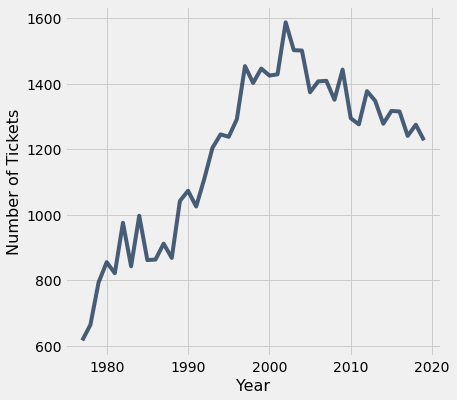

In [57]:
movies.plot('Year', 'Number of Tickets')

In [58]:
movies.move_column("Number of Tickets", 1)

Year,Number of Tickets,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,1226.84,9.16,11237.9,788,Avengers: Endgame
2018,1274.57,9.11,11611.3,878,Black Panther
2017,1240.29,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,1314.88,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,1316.58,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens
2014,1277.45,8.17,10436.8,708,American Sniper
2013,1347.59,8.13,10955.9,689,The Hunger Games: Catching Fire
2012,1376.83,7.96,10959.6,669,The Avengers
2011,1275.42,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2
2010,1294.39,7.89,10212.7,538,Toy Story 3


<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>